In [1]:
# Utilities
import sys
#sys.path.insert(1, r"/Users/Pit/GitHub/Econophysics/Project/TwitterMonitor/")
sys.path.insert(1, r"E:\IlMIoDrive\magistrale\1anno\terzo_periodo\MAS\analysis")
from pathlib import Path 
import json as js
import bz2
import ast
import operator
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
from collections import OrderedDict,Counter,defaultdict
import pickle
import pandas as pd
import numpy as np
from copy import deepcopy
from scipy import stats
from sklearn.neighbors import KernelDensity

# Data Visualization
#import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import networkx as nx
%pylab inline

# Custom 
from datetime import datetime
from importlib import reload
import Econophysics as Ec
import credentials as cr
Ec=reload(Ec)

Populating the interactive namespace from numpy and matplotlib


Load all processed tweets ( AT + 38M):

In [17]:
paths = Ec.get_listOfFiles(r"F:\TwitterUsers\saved_objs_withKeywords") + Ec.get_listOfFiles(r"D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs") 
total = len(paths)

In [18]:
day = Ec.pickle_loader(paths[0])

In [19]:
len(day)

1516449

In [20]:
hashs = [tweet["hashtags"] for tweet in day]

In [21]:
hashs

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['SOPA', 'endofartificaltime'],
 ['NYE2012'],
 [],
 [],
 [],
 [],
 [],
 ['winning'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['FB'],
 [],
 ['flashcards', 'learning', 'studytips'],
 [],
 [],
 ['ebony'],
 ['drinkinginthenewyear'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['prayforjapan'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['NYE', 'Occupy', 'Epic'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Kingdomschools'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['ithinkimalittlelate'],
 [],
 [],
 [],
 [],
 [],
 ['tipssad'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['epicfail'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['1salud'],
 [],
 [],
 [],
 ['mixing'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


Load selected hashtags

In [22]:
# load selected hashtags
hashtags = []
with open(r"E:\IlMioDrive\magistrale\1anno\terzo_periodo\MAS\temp\hashtags\hashtags_1_filtered.txt","rb") as f:
    hashtags = set(pickle.load(f))
    f.close()
len(hashtags)

6948

Define `save_path` and start processing 

In [23]:
%%time
#started at 16:00. finished at 16:55
save_path = r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\hashtagged_tweets_AT_38M.txt"
interesting_tweets = []
for i,path in enumerate(paths):
    day = Ec.pickle_loader(path)
    interesting_tweets = [tweet for tweet in day if not set(tweet["hashtags"]).isdisjoint(hashtags)]
    Ec.pickle_dumper(save_path,interesting_tweets, mode = "ab")
    interesting_tweets = []
    print("Done",i,"out of", total,"Last path = ", path,  end = "\r")
    

        

Wall time: 1h 15min 34st path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_99.txtt 336 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_103.txt 342 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_109.txt 352 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_118.txt 360 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_125.txt 366 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_130.txt 373 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\hydrator_objs_137.txt 383 out of 587 Last path =  D:\TwitterUsers\archiveTeam\final_analysis\hydration\hydrated\threading_objs\h

Load 160'000 users and 10'000 users

In [24]:
ok_users = set(Ec.pickle_loader("F:\TwitterUsers\processed_files\AT_thread_output\ok_users.txt"))

# load ids of monitored users
monitored_users_objects = np.load(r"D:\TwitterUsers\archiveTeam\monitor\initial_monitor_objs\archiveTeam_initial_monitor_objs.npy", allow_pickle = True)
monitored_users_ids = set([user["user_id"] for user in monitored_users_objects ])

Load all hashtagged tweets

In [25]:
hashtagged_tweets = Ec.loader_e(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\hashtagged_tweets_AT_38M.txt")

Extract only tweets written by the 160'000 users and save them

In [26]:
hashtagged_tweets_160000 = [tweet for tweet in hashtagged_tweets if tweet["user_id"] in ok_users ]
Ec.pickle_dumper(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\hashtagged_tweets_AT_38M_160000.txt",hashtagged_tweets_160000)

Extract only tweets written by the 10'000 users and save them

In [27]:
hashtagged_tweets_10000 = [tweet for tweet in hashtagged_tweets if tweet["user_id"] in monitored_users_ids ]
Ec.pickle_dumper(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\hashtagged_tweets_AT_38M_10000.txt",hashtagged_tweets_10000)

Compare

In [28]:
print(len(hashtagged_tweets),len(hashtagged_tweets_160000),len(hashtagged_tweets_10000))

304416 224326 34301


## 2020 retweet network

In this section, we extract all tweets, retweets and favourites 2020 timelines produced by the 10'000 that belong to 2012.
### Retweet Network
#### pre-monitor
##### Hydration

In [2]:
rtwt_pre = np.load(r"F:\TwitterUsers\monitor\retweet_network\archiveTeam_retweet_network_objs.npy", allow_pickle = True)

In [11]:
rtwt_pre_tweet_ids = [tweet_id for user in rtwt_pre for tweet_id in user["tweets_ids"]]

In [16]:
# get hydrator threads
hydrator_threads = Ec.get_hydrator_threads(n_threads = 60,path_start = r"F:\TwitterUsers\monitor\retweet_network\hydration\threading_objs\hydrator_objs_" ,ids =rtwt_pre_tweet_ids ,apps = cr.apps,save_every = 10, restart = False)

In [17]:
Ec.start_threads(hydrator_threads)

thread0 thread1Started with Started with 3000 tweet ids to hydrate
 3000 tweet ids to hydrate
thread2 thread3 Started with 3000 tweet ids to hydrate
Started withthread4  3000Started with 3000 tweet ids to hydrate
thread5  Started with 3000 tweet ids to hydrate
tweet ids to hydrate
thread6 thread7Started with  thread83000Started with thread9 Started with 3000 tweet ids to hydrate
 Started withtweet ids to hydrate thread10
3000   tweet ids to hydrate
Started with3000thread11  tweet ids to hydrate
3000 Started with thread12tweet ids to hydrate  Started with 3000 tweet ids to hydrate
3000 tweet ids to hydrate
thread13
 Started withthread14 Started with 3000 tweet ids to hydrate
 3000thread15  thread16 Started with 3000 tweet ids to hydrate
tweet ids to hydrate
Started with 3000 tweet ids to hydrate
thread17 thread18 Started withStarted withthread19 Started with 3000 tweet ids to hydrate
  thread20 Started with 3000 tweet ids to hydrate
30003000  tweet ids to hydratetweet ids to hydrate

th

In [18]:
Ec.objs_txt_unifier(threading_folder = r"F:\TwitterUsers\monitor\retweet_network\hydration\threading_objs" , destination_folder =r"F:\TwitterUsers\monitor\retweet_network\hydration", name = "10000_hydrated_objs_pre_monitor", mode = "e")

reading...
concatenating
saving


Load hydrated tweets and extract all tweets with date < 2012

In [20]:
tweets_10000_pre_monitor = np.load(r"F:\TwitterUsers\monitor\retweet_network\hydration\10000_hydrated_objs_pre_monitor.npy", allow_pickle = True)

In [22]:
tweets_10000_pre_monitor[0]

{'tweet_id': 1311861496813625345,
 'retweeted_tweet_id': 1311859196892151808,
 'retweeted_user_id': 21175250,
 'hashtags': [],
 'tweet_created_at': 'Fri Oct 02 02:52:08 +0000 2020',
 'text': 'RT @PerryStein: The D.C. mayor is expected to make an announcement soon  on whether schools will reopen in Nov. -- and the union and school…',
 'user_mentions': [21175250],
 'user_id': 21797658,
 'profile_created_at': datetime.datetime(2009, 2, 24, 21, 6, 37),
 'followers_count': 11850,
 'friends_count': 914,
 'statuses_count': 3548,
 'favourites_count': 545}

In [50]:
tweets_10000_pre_monitor_2012 = [tweet for tweet in tweets_10000_pre_monitor if int(tweet["tweet_created_at"][-4:]) == 2012]

In [51]:
tweets_10000_pre_monitor_2012 #there is only one...

[{'tweet_id': 258381822562541569,
  'retweeted_tweet_id': [],
  'retweeted_user_id': [],
  'hashtags': ['debates', 'ObamaWinning'],
  'tweet_created_at': 'Wed Oct 17 01:40:01 +0000 2012',
  'text': "I'm watching @abc's livestream of the #debates. I think @BarackObama is winning. What do you think? http://t.co/ThWj3SvJ #ObamaWinning",
  'user_mentions': [28785486, 813286],
  'user_id': 702191222,
  'profile_created_at': datetime.datetime(2012, 7, 18, 2, 24, 6),
  'followers_count': 5,
  'friends_count': 0,
  'statuses_count': 1,
  'favourites_count': 0}]

Let's try with post monitor hydrated tweets from the 10'000

In [54]:
datetime.strptime('Wed Oct 17 01:40:01 +0000 2012'[:19]+'Wed Oct 17 01:40:01 +0000 2012'[25:], "%a %b %d %H:%M:%S %Y")

datetime.datetime(2012, 10, 17, 1, 40, 1)

In [25]:
tweets_10000_post_monitor = np.load(r"F:\TwitterUsers\monitor\retweet_network_final\monitored\hydrated_tweets\10000_hydrated_objs.npy", allow_pickle = True)

In [57]:
# consider only tweets produced in 2012
tweets_10000_post_monitor_2012 = [tweet for tweet in tweets_10000_post_monitor if datetime.strptime(tweet["tweet_created_at"][:19]+tweet["tweet_created_at"][25:], "%a %b %d %H:%M:%S %Y") <= datetime.strptime("2012-11-01", "%Y-%m-%d") and datetime.strptime(tweet["tweet_created_at"][:19]+tweet["tweet_created_at"][25:], "%a %b %d %H:%M:%S %Y")  >=  datetime.strptime("2012-01-01", "%Y-%m-%d")]

In [58]:
authors_10000_post_monitor_2012 = set([tweet["user_id"] for tweet in tweets_10000_post_monitor_2012])

In [59]:
len(authors_10000_post_monitor_2012)# only 63 authors...

54

Load relevant hashtags and extract only those tweets that contain them

In [36]:
with open(r"F:\TwitterUsers\processed_files\hashtags\hashtags_1_filtered.txt", "rb") as f:
    hashtags = set(pickle.load(f))
    f.close()

In [60]:
tweets_10000_2012 = np.concatenate((tweets_10000_post_monitor_2012 ,tweets_10000_pre_monitor_2012))

In [61]:
tweets_10000_2012.shape

(46140,)

In [62]:
authors_10000_2012_relevant = [tweet for tweet in tweets_10000_2012 if not set(tweet["hashtags"]).isdisjoint(hashtags)]

In [63]:
len(authors_10000_2012_relevant)

2633

Load previously saved `hashtagged_tweets_AT_38M_10000.txt`

In [46]:
with open(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\hashtagged_tweets_AT_38M_10000.txt", "rb") as f:
    hashtagged_tweets_AT_38M_10000 = pickle.load(f)
    f.close()

In [68]:
len(hashtagged_tweets_AT_38M_10000)

34301

In [67]:
#concatenate teets coming form AT + 38M and user timelines
all_tweets = authors_10000_2012_relevant + hashtagged_tweets_AT_38M_10000
len(all_tweets)

36934

In [70]:
# save
with open(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\hashtagged_tweets_AT_38M_2020_timelines_10000.txt", "wb") as f:
    pickle.dump(all_tweets,f )
    f.close()

## Inferred 2012 tweets ids hydration ( aka the new ArchiveTeam)
We now plan to infer all 2012 tweets ids, by taking all those numbers between the first and the last 2012 At id 

In [71]:
# load first processed day and extract first id
with open(r"F:\TwitterUsers\saved_objs_withKeywords\01\objs_0.txt", "rb") as f:
    first_day = pickle.load(f)
    f.close()

In [74]:
first_id =  first_day[0]["tweet_id"]
first_id

153369867985240064

In [75]:
# load last processed day and extract last id
with open(r"F:\TwitterUsers\saved_objs_withKeywords\11\objs_29.txt", "rb") as f:
    last_day = pickle.load(f)
    f.close()

In [76]:
last_id =  last_day[-1]["tweet_id"]
last_id

274769798787907584

In [78]:
num_tweets = last_id-first_id
num_tweets #they are too many

121399930802667520

They are too many, we cannot hydrate them all. So let's repeat the same trick during election period

In [86]:
# load first processed election day and extract first id
with open(r"F:\TwitterUsers\saved_objs_withKeywords\10\objs_20.txt", "rb") as f:
    first_election_day = pickle.load(f)
    f.close()

In [87]:
first_election_id =  first_election_day[0]["tweet_id"]
first_election_id

259901079158927360

In [88]:
# load last processed election day and extract last id
with open(r"F:\TwitterUsers\saved_objs_withKeywords\11\objs_11.txt", "rb") as f:
    last_election_day = pickle.load(f)
    f.close()

In [89]:
last_election_id =  last_election_day[-1]["tweet_id"]
last_election_id

268303691948367872

In [85]:
num_election_tweets = last_election_id-first_election_id
num_election_tweets #they are too many

9127388520640513

In [90]:
num_election_tweets = last_election_id-first_election_id
num_election_tweets #they are too many

8402612789440512

## KDE fitting vs naive hydration
Here we compare hydration performance of tweet_ids resulting from kde fitting during the first ?? days of january vs the naive, difference based approach above. <br>
Let's load tweet ids:

In [57]:
def get_utc(date_str):
    return datetime.strptime(date_str[:19]+date_str[25:], "%a %b %d %H:%M:%S %Y").timestamp()

In [15]:
%%time
paths = Ec.get_listOfFiles(r"F:\TwitterUsers\saved_objs_withKeywords\02")
all_tweets_ids =[]
dates_ids = []
total = len(paths)

day = Ec.pickle_loader(paths[0])
first_date = datetime.strptime(day[]["tweet_created_at"][:19]+day[0]["tweet_created_at"][25:], "%a %b %d %H:%M:%S %Y")
for i,path in enumerate(paths):
    day  = Ec.pickle_loader(path)
#     for tweet in day:
#         dates_ids[datetime.strptime(tweet["tweet_created_at"][:19]+tweet["tweet_created_at"][25:], "%a %b %d %H:%M:%S %Y")] = tweet["tweet_id"]
    dates_ids.extend([(tweet["tweet_created_at"],tweet["tweet_id"]) for tweet in day])
    print("done", i, "out of", total, end = "\r")

Wall time: 10.7 s


In [ ]:
Ec.pickle_dumper(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\all_february_tweets_ids.txt",all_tweets_ids)

In [45]:
first_timestamp = get_utc(day[0]["tweet_created_at"])
day_dates_ids = [( get_utc(tweet["tweet_created_at"]) - first_timestamp ,tweet["tweet_id"]) for tweet in day]

18250

In [65]:
sampled_tweets_ids = [day_dates_ids[i] for i in range(len(day_dates_ids)) if i%10 == 0 ]
len(sampled_tweets_ids)

172170

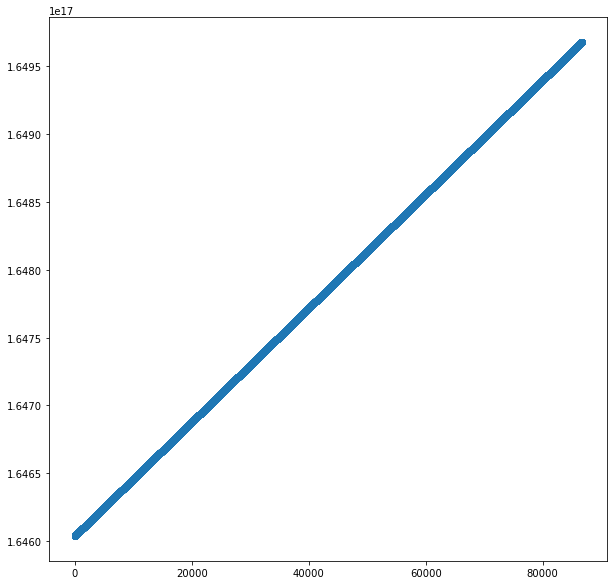

In [66]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
_ = ax.scatter([sample[0] for sample in sampled_tweets_ids ],[sample[1] for sample in sampled_tweets_ids] )

Visualiza tweet ids

In [12]:
sampled_tweets_ids = [all_tweets_ids[i] for i in range(len(all_tweets_ids)) if i%1000 == 0 ]

In [13]:
len(sampled_tweets_ids)

49263

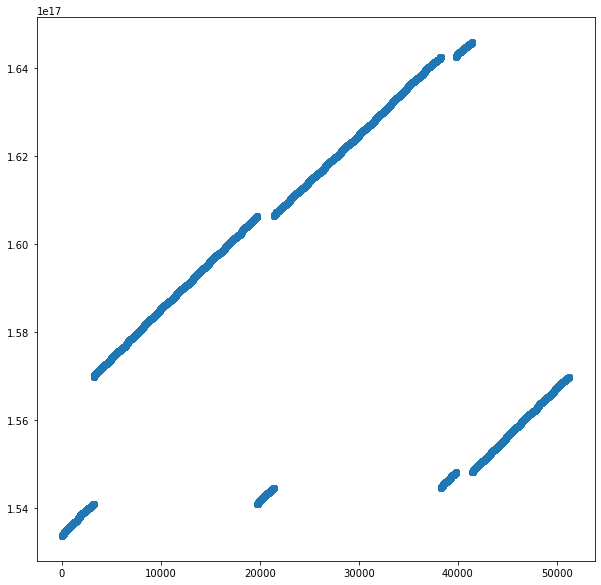

In [9]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
_ = ax.scatter(range(0,len(sampled_tweets_ids)),sampled_tweets_ids )

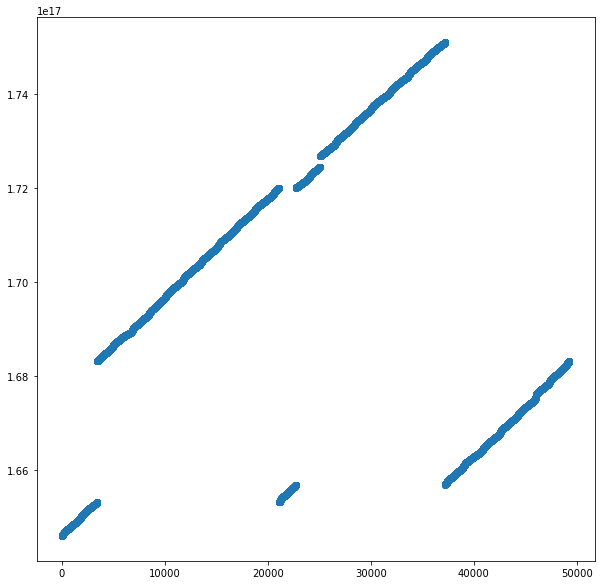

In [14]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
_ = ax.scatter(range(0,len(sampled_tweets_ids)),sampled_tweets_ids )

In [78]:
%%time
all_tweets_ids_unique = np.array(list(set(all_tweets_ids)))
all_tweets_ids_unique_sk = all_tweets_ids_unique.reshape(-1,1)

Wall time: 10.3 s


In [79]:
%%time
kernel_scot = stats.gaussian_kde(all_tweets_ids_unique, bw_method  = "scott")
kernel_silverman = stats.gaussian_kde(all_tweets_ids_unique, bw_method  = "silverman")
kernel_bw = stats.gaussian_kde(all_tweets_ids_unique, bw_method  = 0.01)

Wall time: 787 ms


In [24]:
# instantiate and fit the KDE model
%%time
kernel_sk = KernelDensity(bandwidth=0.5, kernel='gaussian')
kernel_sk.fit(all_tweets_ids_unique_sk)

KernelDensity(bandwidth=0.5)

In [80]:
%%time
data_sample = np.random.choice(all_tweets_ids_unique, 10000, replace=False)
predicted_scot = kernel_scot.resample(10000)
predicted_silverman = kernel_silverman.resample(10000)
predicted_bw  = kernel_bw.resample(10000)
#predicted_sk = kernel_sk.sample(10000)
#predicted_sk_flt = [val[0] for val in predicted_sk]
uniform_sample = np.random.uniform(all_tweets_ids[0],all_tweets_ids[-1], 10000)

Wall time: 869 ms


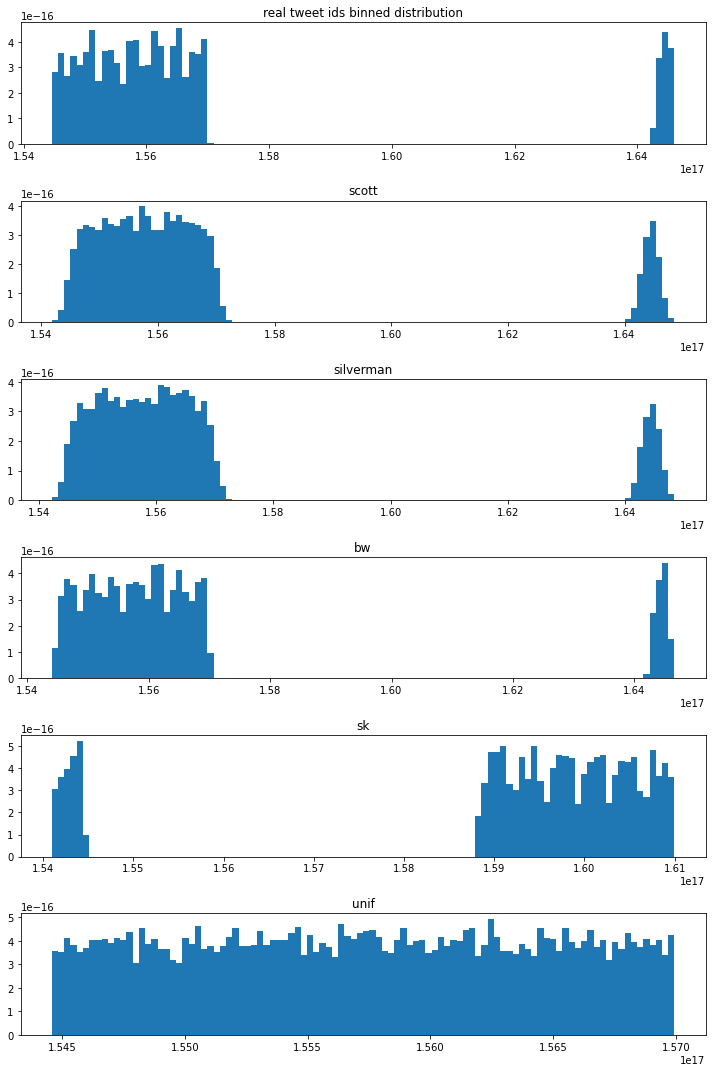

In [81]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1, figsize = (10,15))
ax1.set_title("real tweet ids binned distribution")
_ = ax1.hist( data_sample, bins = 100, density = True)
ax2.set_title("scott")
_ = ax2.hist( predicted_scot[0], bins = 100, density = True)
ax3.set_title("silverman")
_ = ax3.hist( predicted_silverman[0], bins = 100, density = True)
ax4.set_title("bw")
_ = ax4.hist( predicted_bw[0], bins = 100, density = True)
ax5.set_title("sk")
_ = ax5.hist( predicted_sk_flt, bins = 100, density = True)
ax6.set_title("unif")
_ = ax6.hist( uniform_sample, bins = 100, density = True)
plt.tight_layout()
#ax.hist(predicted_sample,bins = 1000, density = True)

Now let's do it during the election period ( when we have more chances to get interesting hashtags)

In [82]:
#only 25 days
october_folder = r"F:\TwitterUsers\saved_objs_withKeywords\10\\"
november_folder = r"F:\TwitterUsers\saved_objs_withKeywords\11\\"

october_all_days = Ec.get_listOfFiles(october_folder)
november_all_days = Ec.get_listOfFiles(november_folder)


october_interesting_days = []
november_interesting_days = []
for i in range(len(october_all_days)):
    if int(october_all_days[i][october_all_days[i].rfind("objs_")+len("objs_"):october_all_days[i].rfind(".txt")]) >= 19:
        october_interesting_days.append(october_all_days[i])
        

for i in range(len(november_all_days)):
    if int(november_all_days[i][november_all_days[i].rfind("objs_")+len("objs_"):november_all_days[i].rfind(".txt")]) <= 12:
        november_interesting_days.append(november_all_days[i])
        
interesting_days = october_interesting_days + november_interesting_days
total = len(interesting_days)
print(total)

25


In [83]:
all_tweets_ids =[]
for i,path in enumerate(interesting_days):
    day  = Ec.pickle_loader(path)
    all_tweets_ids.extend([tweet["tweet_id"] for tweet in day])
    print("done", i, "out of", total, end = "\r")

In [84]:
%%time
all_tweets_ids_unique = np.array(list(set(all_tweets_ids)))
all_tweets_ids_unique_sk = all_tweets_ids_unique.reshape(-1,1)

Wall time: 58.8 s


In [136]:
%%time
# kernel_scot = stats.gaussian_kde(all_tweets_ids_unique, bw_method  = "scott")
# kernel_silverman = stats.gaussian_kde(all_tweets_ids_unique, bw_method  = "silverman")
kernel_bw = stats.gaussian_kde(all_tweets_ids_unique, bw_method  = 0.0000001)

Wall time: 1.05 s


In [91]:
%%time
data_sample = np.random.choice(all_tweets_ids_unique, 10000, replace=False)
# predicted_scot = kernel_scot.resample(10000)
# predicted_silverman = kernel_silverman.resample(10000)
predicted_bw  = kernel_bw.resample(10000)
#predicted_sk = kernel_sk.sample(10000)
#predicted_sk_flt = [val[0] for val in predicted_sk]
uniform_sample = np.random.uniform(all_tweets_ids[0],all_tweets_ids[-1], 10000)

Wall time: 3.52 s


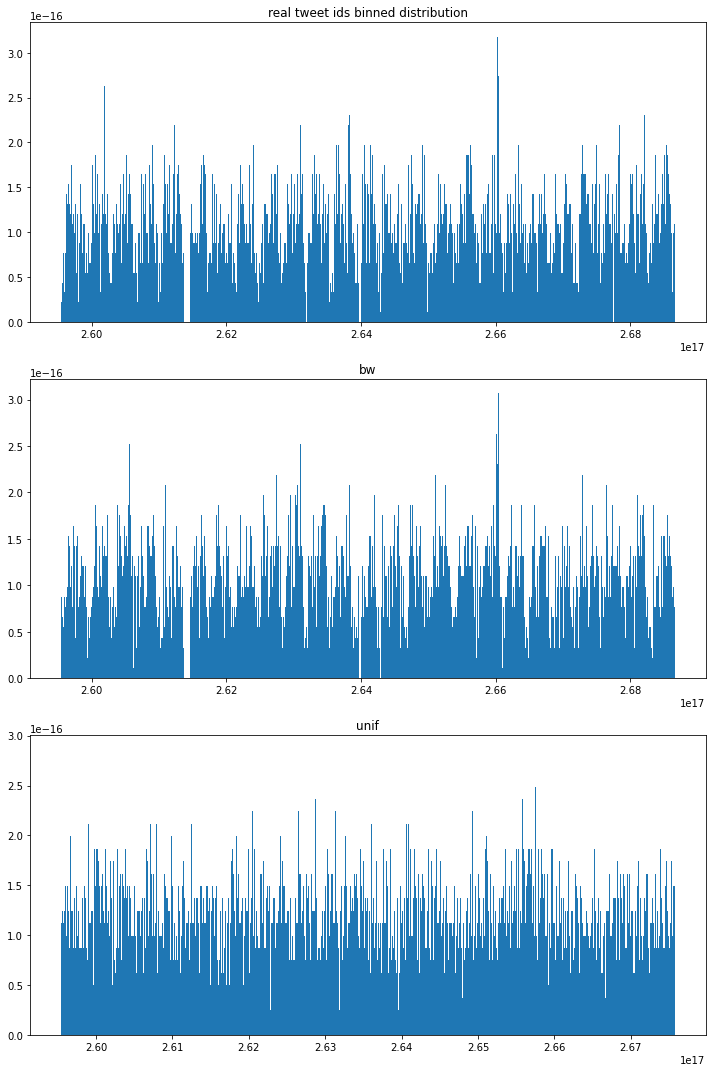

In [93]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (10,15))
ax1.set_title("real tweet ids binned distribution")
_ = ax1.hist( data_sample, bins = 1000, density = True)
ax2.set_title("bw")
_ = ax2.hist( predicted_bw[0], bins = 1000, density = True)
ax3.set_title("unif")
_ = ax3.hist( uniform_sample, bins = 1000, density = True)
plt.tight_layout()
#ax.hist(predicted_sample,bins = 1000, density = True)

In [94]:
all_tweets_ids_set = set(all_tweets_ids_unique)

In [137]:
sampled_bw = []
while len(sampled_bw) < 1000000:
    sampled_bw.extend(list(set(kernel_bw.resample(1000000)[0]) - all_tweets_ids_set))
sampled_bw = [int(val) for val in sampled_bw]
print(len(sampled_bw))

1000000


In [138]:
sampled_bw[0]

266048150817472512

In [140]:
# get hydrator threads
sampled_hydrator_threads = Ec.get_hydrator_threads(n_threads = 100,path_start = r"D:\TwitterUsers\archiveTeam\final_analysis\hydration\tweet_id_inference\election_period\threading_objs_inferred\hydrator_objs_" ,ids =sampled_bw ,apps = cr.apps,save_every = 10, restart = False)

In [141]:
Ec.start_threads(sampled_hydrator_threads)

thread0 Started with 10000 tweet ids to hydrate
thread1 Started with 10000 tweet ids to hydrate
thread2 Started with 10000 tweet ids to hydrate
thread3 Started with 10000 tweet ids to hydrate
thread4 Started with 10000 tweet ids to hydrate
thread5 Started with 10000 tweet ids to hydrate
thread6 Started with 10000 tweet ids to hydrate
thread7 thread8Started with Started with 10000 tweet ids to hydrate
 thread910000thread10   tweet ids to hydrateStarted with
 thread11 Started with 10000 tweet ids to hydrate
10000Started with thread12tweet ids to hydrate Started with 10000 tweet ids to hydrate

thread13  Started with thread1410000 tweet ids to hydrate
 thread15 Started with 10000 tweet ids to hydrate
Started with10000 10000 tweet ids to hydrate
thread16 Started with 10000 tweet ids to hydrate
 thread17tweet ids to hydrate Started with 10000 tweet ids to hydrate

thread18 thread19Started with Started with 10000 tweet ids to hydrate
 thread20 10000Started with 10000 tweet ids to hydrate
 th

In [142]:
Ec.objs_txt_unifier(threading_folder = r"D:\TwitterUsers\archiveTeam\final_analysis\hydration\tweet_id_inference\election_period\threading_objs_inferred" , destination_folder =r"D:\TwitterUsers\archiveTeam\final_analysis\hydration\tweet_id_inference\election_period", name = "sampled_inferred", mode = "e")

reading...
concatenating
saving


In [143]:
hydrated = np.load(r"D:\TwitterUsers\archiveTeam\final_analysis\hydration\tweet_id_inference\election_period\sampled_inferred.npy", allow_pickle = True)

In [135]:
hydrated

array([{'tweet_id': 261341142166155264, 'retweeted_tweet_id': [], 'retweeted_user_id': [], 'hashtags': [], 'tweet_created_at': 'Thu Oct 25 05:39:18 +0000 2012', 'text': 'All We Do Is Smoke And Fuck', 'user_mentions': [], 'user_id': 319722882, 'profile_created_at': datetime.datetime(2011, 6, 18, 16, 32, 22), 'followers_count': 1145, 'friends_count': 1281, 'statuses_count': 24963, 'favourites_count': 2115},
       {'tweet_id': 266842823406530560, 'retweeted_tweet_id': [], 'retweeted_user_id': [], 'hashtags': ['primalssc'], 'tweet_created_at': 'Fri Nov 09 10:01:01 +0000 2012', 'text': '@StrongGrizzly cook with it, slop it on your face, heal cuts, dry skin, bake veggies, dry bacon, add to brownies, melt with cocoa #primalssc', 'user_mentions': [872331697], 'user_id': 21040230, 'profile_created_at': datetime.datetime(2009, 2, 16, 23, 3, 50), 'followers_count': 533, 'friends_count': 573, 'statuses_count': 15581, 'favourites_count': 459},
       {'tweet_id': 263767624540901376, 'retweeted_twe

In [146]:
hydrated

array([{'tweet_id': 260051855869083648, 'retweeted_tweet_id': [], 'retweeted_user_id': [], 'hashtags': ['ixionsaga'], 'tweet_created_at': 'Sun Oct 21 16:16:08 +0000 2012', 'text': 'どっちがカマか分からんぞｗ #ixionsaga', 'user_mentions': [], 'user_id': 370562886, 'profile_created_at': datetime.datetime(2011, 9, 9, 7, 24, 2), 'followers_count': 522, 'friends_count': 620, 'statuses_count': 66016, 'favourites_count': 4508},
       {'tweet_id': 265015533534068736, 'retweeted_tweet_id': 265014400400904192, 'retweeted_user_id': 136898100, 'hashtags': [], 'tweet_created_at': 'Sun Nov 04 09:00:01 +0000 2012', 'text': 'RT @TVXQfacts: [JAEJOONG] Cassiopeia was created because they loved TVXQ as a whole, not because they loved individual members." http:// ...', 'user_mentions': [136898100], 'user_id': 96470243, 'profile_created_at': datetime.datetime(2009, 12, 13, 2, 51, 32), 'followers_count': 145, 'friends_count': 214, 'statuses_count': 7705, 'favourites_count': 391},
       {'tweet_id': 267816649170767872,

In [6]:
from IPython.display import FileLink, FileLinks
q = FileLink(r"E:\IlMIoDrive\magistrale\1anno\terzo_periodo\MAS\analysis\EconophysicsInitialization\notebooks\snowflake\snowflake-snowflake-2010\src\main\scala\com\twitter\service\snowflake\IdWorker.scala")

## Tweet Id generation
### Resources:

#### Learn the basics of Scala
- [Learn how scala's binary representations work](https://www.tutorialspoint.com/scala/scala_operators.htm)
- [Scala functions 1](https://www.tutorialspoint.com/scala/scala_functions.htm#:~:text=Function%20Definitions,-A%20Scala%20function&text=A%20function%2C%20that%20does%20not,Scala%2C%20they%20are%20called%20procedures.)
- [Scala functions 2](https://blog.knoldus.com/scala-best-practices-say-no-to-return/)
- [Learn Two's Complement](https://www.youtube.com/watch?v=qTAw30GgDZs&ab_channel=MarkLewis)

#### Understand snowflake's id generation code
- [Look at snowflake's README.mkd IdWorker.scala](https://github.com/twitter-archive/snowflake/releases/tag/snowflake-2010)

Let's first save all tweet ids in binary form

In [ ]:
months= ["january", "february","march","april","may","june","july","august","september","october","november"]

In [38]:
%%time
paths = Ec.get_listOfFiles(r"F:\TwitterUsers\saved_objs_withKeywords")
all_tweets_ids =[]
total = len(paths)

for i,path in enumerate(paths):
    month = path[path.rfind("s\\")+2 : path.rfind("s\\")+4]+"_"
    day_extension = path[path.rfind("_")+1:]
    day  = Ec.pickle_loader(path)
#     for tweet in day:
#         dates_ids[datetime.strptime(tweet["tweet_created_at"][:19]+tweet["tweet_created_at"][25:], "%a %b %d %H:%M:%S %Y")] = tweet["tweet_id"]
#     dates_ids.extend([(tweet["tweet_created_at"],tweet["tweet_id"]) for tweet in day])
    all_tweets_ids = [tweet["tweet_id"] for tweet in  day]
    Ec.pickle_dumper(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\all_daily_ids\tweet_ids_"+month+day_extension, all_tweets_ids)
    all_tweets_ids = []
    print("done", i, "out of", total, end = "\r")

Wall time: 58min 8s


Construct the metadata for the enterprise

In [ ]:
%%time

# get metadata
start_path = r"F:\TwitterUsers\final_analysis\create_hashtagged_tweets\2012_10000_grab\all_daily_ids\\"
dirs = [start_path + path for path in  os.listdir(start_path)]

for j,dirct in enumerate(dirs):
    
    paths   = Ec.get_listOfFiles(dirct)
    
    metadatum = dict()
    t_mId_seq = []
    total_days = len(paths)
    for i,path in enumerate(paths):
        day = Ec.pickle_loader(path)
        #t_mId_seq.append(map(lambda x: (eval(bin(x)[:-22]),eval("0b"+bin(x)[-22:-12]),eval("0b"+bin(x)[-12:])) , day))
        t_mId_seq.extend([ (eval(bin(tweet_id)[:-22]),eval("0b"+bin(tweet_id)[-22:-12]),eval("0b"+bin(tweet_id)[-12:])) for tweet_id in day])
        print("done",i,"-th day out of",total_days, "within",j,"-th month out of",str(11),"months", end = "\r" )
    print("extracting timestamps...", end = "\r")
    timestamps = [triple[0] for triple in t_mId_seq]
    #timestamps = [triple[0] for mp in t_mId_seq for triple in mp]
    print("timestamps_delta_regularity...", end = "\r")
    metadatum["timestamps_delta_regularity"] = [max(timestamps) , min(timestamps), sum([1 if str(timestamp)[-3:-1] != "00" else 0 for timestamp in timestamps])]
    print("unique_machines...", end = "\r")
    metadatum["unique_machines"]  = dict(Counter([triple[1] for triple in t_mId_seq])) #list(set([triple[1] for triple in t_mId_seq]))
    print("sequences_counter...", end = "\r")
    metadatum["sequences_counter"] = dict(Counter([triple[2] for triple in t_mId_seq])) #[np.mean()]
    
    Ec.pickle_dumper(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\metadata\metadatum_"+dirct[-2:]+".txt",metadatum)
    

Get the enterprise threads

In [3]:
apps = cr.apps

In [4]:
630772258 - 630758902 

13356

In [5]:
Ec = reload(Ec)
enterprise_threads = Ec.get_enterprise_threads(n_threads = len(apps) ,apps =  apps,metadata_path= r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\metadata",users_ids_path = r"F:\TwitterUsers\backup\monitor\ids\user_ids.npy", path_start = r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\threading_objs\\", name = "enterprise_objs_" , restart  = False  ) #630772258

names_splits =  [['thread0', 'thread1', 'thread2', 'thread3', 'thread4', 'thread5', 'thread6', 'thread7', 'thread8', 'thread9', 'thread10', 'thread11', 'thread12', 'thread13', 'thread14', 'thread15', 'thread16', 'thread17'], ['thread18', 'thread19', 'thread20', 'thread21', 'thread22', 'thread23', 'thread24', 'thread25', 'thread26', 'thread27', 'thread28', 'thread29', 'thread30', 'thread31', 'thread32', 'thread33', 'thread34', 'thread35'], ['thread36', 'thread37', 'thread38', 'thread39', 'thread40', 'thread41', 'thread42', 'thread43', 'thread44', 'thread45', 'thread46', 'thread47', 'thread48', 'thread49', 'thread50', 'thread51', 'thread52', 'thread53'], ['thread54', 'thread55', 'thread56', 'thread57', 'thread58', 'thread59', 'thread60', 'thread61', 'thread62', 'thread63', 'thread64', 'thread65', 'thread66', 'thread67', 'thread68', 'thread69', 'thread70', 'thread71'], ['thread72', 'thread73', 'thread74', 'thread75', 'thread76', 'thread77', 'thread78', 'thread79', 'thread80', 'thread81', 

Start the threads

In [ ]:
# 11 threads lookup approx 120000 tweet ids in 8 minutes per thread 
# 22 threads lookup approx 750000*22 tweet ids in 48 min-> 15625 al min -> 589 gg
# started at 18:37 with 257 threads( only 6 months), lookup approx 68'000*257 in 31 min -> 2193 al min -> 233gg
# started at 12:02 with 125 threads ( pietro launched the other 125) , 
# lookup approx 80000 tweet ids in 17 min -> 93 gg
#pietro : started at 12:02 125 threads (starting from july), lookup approx 33000 tweet ids in 17 min -> 291 gg
#started at 9:11 with 125 threads ( only 6 months), lookup 487000 in 104 minutes -> 
Ec.start_threads(enterprise_threads) #started at 12:02

thread0 Started with 630758902 tweet ids to hydrate
thread1 Started with 630763422thread2  Started with 630757893 tweet ids to hydrate
tweet ids to hydrate
thread3 thread4Started with Started with 630764323 tweet ids to hydrate
 630778806thread5  Started withthread6 tweet ids to hydrate Started with 630797280 tweet ids to hydrate
630775252
thread7 Started with 630803225 tweet ids to hydrate tweet ids to hydrate
thread8
thread9 Started with 630766788 tweet ids to hydrate
 Started with 630784014 tweet ids to hydrate
thread10 Started with 630776673 tweet ids to hydrate
thread11 Started with 630771381 tweet ids to hydrate
thread12thread13 Started with 630778039 tweet ids to hydrate
 Started with 630779331 tweet ids to hydrate
thread14 Started with 630779767 tweet ids to hydrate
thread15 Started with 630731668 tweet ids to hydrate
thread16 Started with 630783737 tweet ids to hydrate
thread17 Started with 630719525 tweet ids to hydrate
thread18 thread19 Started with 630742464 tweet ids to hy

In [2]:
# various saved objs loading attempts
# tweets = Ec.pickle_loader(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\threading_objs\enterprise_objs_0.txt")
# tweets_npy = np.load(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\threading_objs\proof\enterprise.npy", allow_pickle = True)
# tweets_e = Ec.loader_e(r"D:\TwitterUsers\archiveTeam\final_analysis\create_hashtagged_tweets\2012_10000_grab\threading_objs\enterprise_objs_0.txt")

In [7]:
# this is teh one that works best
#tweets_e

array([{'tweet_id': 153369869616812032, 'retweeted_tweet_id': [], 'retweeted_user_id': [], 'hashtags': [], 'tweet_created_at': 'Sun Jan 01 07:00:01 +0000 2012', 'text': 'HAPPY NEW YEAR Mountain Time!!! Make the most of your 2012!', 'user_mentions': [], 'user_id': 19026288, 'profile_created_at': datetime.datetime(2009, 1, 15, 15, 56, 6), 'followers_count': 32964, 'friends_count': 3107, 'statuses_count': 80441, 'favourites_count': 7853},
       {'tweet_id': 153369872225681408, 'retweeted_tweet_id': [], 'retweeted_user_id': [], 'hashtags': ['iNews9k', 'ThatWas2011'], 'tweet_created_at': 'Sun Jan 01 07:00:01 +0000 2012', 'text': '#iNews9k #ThatWas2011 May: Harold Camping reviews Roland Emmerich\'s "2012" - "The world can end now, because this is the best movie ever."', 'user_mentions': [], 'user_id': 47451515, 'profile_created_at': datetime.datetime(2009, 6, 15, 21, 35, 50), 'followers_count': 2697, 'friends_count': 1665, 'statuses_count': 162162, 'favourites_count': 20704},
       {'tweet